<div class="alert alert-block alert-info"><font size="6"><b>Sprint 4 Task 1 (S04_T01)</b></font><h6 align="right"><u>Author: Alberto Achaval</u></h6></div>

## <SPAN style=color:#1F618D>Level 1</SPAN>

### <SPAN style=color:#1F618D>Practice 1</SPAN>

<SPAN style=color:#1F618D>Standardize, identify, and enumerate each of the attributes / variables in the "Web_access_log-akumenius.com" file structure in the "Data-sources" GitHub repository</SPAN>

To solve this practice we start by **importing** all the required libraries:

In [1]:
import numpy as np
import pandas as pd
import re # regex library
import seaborn as sns
import matplotlib.pyplot as plt

Now we load the Log register and see what we have:

In [50]:
logs_test = pd.read_csv('Web_access_log-akumenius.com.txt', on_bad_lines='skip')
logs_test

,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
...,...
168012,www.akumenius.com 5.255.253.53 - - [02/Mar/201...
168013,www.akumenius.com 74.86.158.107 - - [02/Mar/20...
168014,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...
168015,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...


As we can see, data is all together in one column making it hard to work with. We are going to divide it by using **Regular Expressions (regex)**.  

Let's take a row as an example: 

<SPAN style=color:#8D1F3B>***www.akumenius.com 66.249.76.216 - - [23/Feb/2014:03:10:35 +0100] "GET /hoteles-baratos/ofertas-hotel-Faena-Hotel-Buenos-Aires-en-Downtown-129723b-destinos.html HTTP/1.1" 404 3100 "-" "Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)" VLOG=-***</SPAM>

First of all, let's identify all the attributes / variables we have in each log entry (from APACHE):

1. **host**: string type // e.g.: localhost, www.akumenius.com  
  
  
2. **ip**: string type // IP address, e.g.: 66.249.76.216


3. **logname**: string  // remote user, e.g: clarcat
  
  
3. **date**: date type // e.g.: 23/Feb/2014:03:10:35 +0100


5. **timezone:** date type // e.g.: +100
  
  
4. **request**: string type with request line from client (is given in double quotes) // e.g.: "GET /hoteles-baratos/ofertas-hotel-Faena-Hotel-Buenos-Aires-en-Downtown-129723b-destinos.html HTTP/1.1"   
    4.1 **method**: string type // e.g.:GET  
    4.2 **resource**: string type // e.g.: /hoteles-baratos/ofertas-hotel-Faena-Hotel-Buenos-Aires-en-Downtown-129723b-destinos.html  
    4.3: **protocol**: string type // e.g.: HTTP/1.1  
  
    
5. **status**: numeric type, This is the status code that the server sends back to the client // e.g.: 404 // successful response (codes beginning in 2), a redirection (codes beginning in 3), an error caused by the client (codes beginning in 4) 
  
  
6. **size**: numeric type, size of the object returned to the client // e.g.: 3100  


9. **path**: string type // e.g.: 'http://www.akumenius.com/"', ...,

  
7. **useragent**: string type, This is the identifying information that the client browser reports about itself // e.g.: Mozilla/5.0 (compatible; Googlebot/2.1; 
  
  
8. **referer**: string type, This gives the site that the client reports having been referred from // e.g.: http://www.google.com/bot.html

## <SPAN style=color:#1F618D>Level 2</SPAN>

### <SPAN style=color:#1F618D>Practice 2</SPAN>

<SPAN style=color:#1F618D>Web access log data cleansing, preprocessing, structuring and transforming (dataframe)</SPAN>

Now we are going to load de dataset again with the **regex_logs** variable identification we previously made and keep only those columns that contain useful data and rename them.

In [51]:
regex_logs = r'(.*?) (.*?) (.*?) (.*?) \[(.*?) (.*?)\] "(.*?) (.*?) (.*?)" (.*?) (.*?) "(.*?) (.*?) (.*?)"?VLOG=-'
logs = pd.read_csv('Web_access_log-akumenius.com.txt', sep = regex_logs, engine = 'python', header = None)
logs.sample(n = 10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
48348,NaN,www.akumenius.com,62.87.24.215,-,-,24/Feb/2014:07:30:20,100.0,GET,/libraries/jqueryui/css/ui-lightness/images/ui...,HTTP/1.1,200.0,104,"http://www.akumenius.com/""","""Mozilla/5.0","(Windows NT 6.1) AppleWebKit/537.36 (KHTML, li...",NaN
76002,NaN,www.akumenius.com,83.46.243.32,-,-,24/Feb/2014:16:47:02,100.0,GET,/includes/images/uploaded/CHOLLOS/CHULETON-DE-...,HTTP/1.1,200.0,17312,"http://www.akumenius.com/chollos""","""Mozilla/5.0",(compatible; MSIE 10.0; Windows NT 6.2; WOW64;...,NaN
89946,NaN,www.akumenius.com,83.56.168.143,-,-,25/Feb/2014:00:41:57,100.0,GET,/modules/raton/views/themes/bcoos/images/boto_...,HTTP/1.1,200.0,8158,"http://www.akumenius.com/""","""Mozilla/5.0",(Macintosh; Intel Mac OS X 10_8_4) AppleWebKit...,NaN
198851,NaN,www.akumenius.com,85.48.148.136,-,-,27/Feb/2014:15:01:34,100.0,GET,/modules/raton/views/themes/bcoos/images/busca...,HTTP/1.1,200.0,881,http://www.akumenius.com/modules/raton/views/t...,"""Mozilla/5.0",(Windows NT 6.1; WOW64; rv:27.0) Gecko/2010010...,NaN
124947,NaN,www.akumenius.com,80.59.58.36,-,-,25/Feb/2014:17:41:24,100.0,GET,/modules/raton/views/themes/bcoos/js/home.js,HTTP/1.1,200.0,7489,http://www.akumenius.com/?gclid=COnm65Dc57wCFY...,"""Mozilla/5.0","(Windows NT 5.1) AppleWebKit/537.36 (KHTML, li...",NaN
33912,NaN,www.akumenius.com,88.11.88.249,-,-,23/Feb/2014:21:09:05,100.0,GET,/modules/raton/views/themes/bcoos/images/busca...,HTTP/1.1,200.0,2591,"http://www.akumenius.com/hotel-list""","""Mozilla/5.0",(iPad; CPU OS 7_0_2 like Mac OS X) AppleWebKit...,NaN
257899,NaN,www.akumenius.com,80.20.102.18,-,-,01/Mar/2014:20:18:00,100.0,GET,/includes/images/uploaded/venecia_large.png,HTTP/1.1,200.0,48330,"-""","""Mozilla/5.0",(Linux; U; Android 4.1.2; es-es; GT-I8190 Buil...,NaN
40548,NaN,www.akumenius.com,180.76.5.192,-,-,24/Feb/2014:00:00:46,100.0,GET,/destinos-baratos/destinos-caracteristicas/hot...,HTTP/1.1,200.0,8289,"-""","""Mozilla/5.0",(compatible; Baiduspider/2.0; +http://www.baid...,NaN
190067,NaN,www.akumenius.com,5.10.83.68,-,-,27/Feb/2014:11:25:17,100.0,GET,/destinos-baratos/hoteles-en-Ankeny_ESTADOS%20...,HTTP/1.1,200.0,7785,"-""","""Mozilla/5.0",(compatible; AhrefsBot/5.0; +http://ahrefs.com...,NaN
232890,NaN,www.akumenius.com,79.158.161.64,-,-,28/Feb/2014:11:20:19,100.0,GET,/modules/raton/views/themes/bcoos/css/2column_...,HTTP/1.1,200.0,11314,"http://www.akumenius.com/hotel-list""","""Mozilla/5.0",(Linux; U; Android 4.1.1; es-es; Woxter Tablet...,NaN


In [52]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       42 non-null      object 
 1   1       261831 non-null  object 
 2   2       261831 non-null  object 
 3   3       261831 non-null  object 
 4   4       261831 non-null  object 
 5   5       261831 non-null  object 
 6   6       261831 non-null  float64
 7   7       261831 non-null  object 
 8   8       261831 non-null  object 
 9   9       261831 non-null  object 
 10  10      261831 non-null  float64
 11  11      261831 non-null  object 
 12  12      261831 non-null  object 
 13  13      261831 non-null  object 
 14  14      261196 non-null  object 
 15  15      0 non-null       float64
dtypes: float64(3), object(13)
memory usage: 32.0+ MB


Let's see what we have in columns:

In [53]:
logs[0].unique()

array([nan,
       'localhost 220.181.108.108 - - [23/Feb/2014:14:14:41 +0100] "-" 408 - "-" "-" VLOG=-',
       'localhost 69.61.47.114 - - [23/Feb/2014:16:42:58 +0100] "-" 408 - "-" "-" VLOG=-',
       'localhost 220.181.108.79 - - [23/Feb/2014:19:21:43 +0100] "-" 408 - "-" "-" VLOG=-',
       'localhost 188.87.251.64 - - [24/Feb/2014:08:48:59 +0100] "-" 408 - "-" "-" VLOG=-',
       'localhost 180.76.5.214 - - [24/Feb/2014:10:23:25 +0100] "-" 408 - "-" "-" VLOG=-',
       'localhost 62.175.136.122 - - [24/Feb/2014:13:08:00 +0100] "-" 408 - "-" "-" VLOG=-',
       'localhost 62.175.136.122 - - [24/Feb/2014:13:08:01 +0100] "-" 408 - "-" "-" VLOG=-',
       'localhost 62.175.136.122 - - [24/Feb/2014:13:08:02 +0100] "-" 408 - "-" "-" VLOG=-',
       'localhost 87.111.221.104 - - [24/Feb/2014:13:28:49 +0100] "-" 408 - "-" "-" VLOG=-',
       'localhost 87.111.221.104 - - [24/Feb/2014:13:30:51 +0100] "-" 408 - "-" "-" VLOG=-',
       'localhost 87.111.221.104 - - [24/Feb/2014:13:30:55 +01

In [54]:
logs[0].count()

42

These 42 rows have a status code of 408, which means that a client-side error has occurred. This is the reason why these rows have not been parsed correctly. I'll delete this column and these rows, but we can always come back to it for a detailed marginal study.

In [6]:
logs[3].unique()

array(['-', None], dtype=object)

We will delet column (3).

In [7]:
logs[15].unique()

array([nan])

Will delet this column as well and rename the remaining ones as we detailed in <SPAN style=color:#1F618D>Practice 1</SPAN>.

In [58]:
logs.drop(logs[logs[0].notnull()].index, inplace = True) # eliminate rows, logs[logs[0].isnull()]

logs.drop(columns = [0, 3, 15], inplace = True) # eliminate columns

colsdict = {1: 'host', 
            2: 'ip', 
            4: 'logname', 
            5: 'date', 
            6: 'timezone', 
            7: 'method', 
            8: 'resource', 
            9: 'protocol', 
            10: 'status', 
            11: 'size', 
            12: 'path', 
            13: 'useragent', 
            14: 'refer'}

logs.rename(columns= colsdict, inplace = True) # rename remaining columns

In [59]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261831 entries, 0 to 261872
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   host       261831 non-null  object 
 1   ip         261831 non-null  object 
 2   logname    261831 non-null  object 
 3   date       261831 non-null  object 
 4   timezone   261831 non-null  float64
 5   method     261831 non-null  object 
 6   resource   261831 non-null  object 
 7   protocol   261831 non-null  object 
 8   status     261831 non-null  float64
 9   size       261831 non-null  object 
 10  path       261831 non-null  object 
 11  useragent  261831 non-null  object 
 12  refer      261196 non-null  object 
dtypes: float64(2), object(11)
memory usage: 28.0+ MB


Let's clean the dataframe a little bit by replacing mixed symbols:

In [60]:
logs['resource'].replace({'/': '-', '*': '-'}, inplace = True)
logs['path'].replace({'-"': '-'}, inplace = True)
logs['useragent'] = logs['useragent'].str.replace('"','')
logs['refer'] = logs['refer'].str.replace('"', '')

Finally, let's change to datetime64 type the **date** column and to numeric type the **size** column:

In [61]:
logs['date']=pd.to_datetime(logs['date'], format='%d/%b/%Y:%H:%M:%S') # convert from object to date

logs.size = pd.to_numeric(logs.size, errors = 'coerce') # coerce errors for - cells

In [62]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261831 entries, 0 to 261872
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   host       261831 non-null  object        
 1   ip         261831 non-null  object        
 2   logname    261831 non-null  object        
 3   date       261831 non-null  datetime64[ns]
 4   timezone   261831 non-null  float64       
 5   method     261831 non-null  object        
 6   resource   261831 non-null  object        
 7   protocol   261831 non-null  object        
 8   status     261831 non-null  float64       
 9   size       261831 non-null  int32         
 10  path       261831 non-null  object        
 11  useragent  261831 non-null  object        
 12  refer      261196 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(9)
memory usage: 27.0+ MB


In [63]:
logs.sample(10)

,host,ip,logname,date,timezone,method,resource,protocol,status,size,path,useragent,refer
127733,localhost,127.0.0.1,-,2014-02-25 18:03:26,100.0,OPTIONS,-,HTTP/1.0,200.0,3403803,-,Apache,(internal dummy connection)
126307,www.akumenius.com,80.26.232.117,-,2014-02-25 17:52:35,100.0,GET,/includes/images/uploaded/Slideshow/Fotolia_55...,HTTP/1.1,200.0,3403803,http://www.akumenius.com/?gclid=CPfn9dDe57wCFT...,Mozilla/5.0,(iPad; CPU OS 6_0_1 like Mac OS X) AppleWebKit...
44402,www.akumenius.com,181.151.21.227,-,2014-02-24 02:47:23,100.0,GET,/libraries/jquery/jquery-1.4.2.min.js,HTTP/1.1,200.0,3403803,http://www.akumenius.com/escapadas/san-valenti...,Mozilla/5.0,(iPhone; CPU iPhone OS 7_0_4 like Mac OS X) Ap...
151579,www.akumenius.com,95.60.36.141,-,2014-02-26 07:04:32,100.0,GET,/icon.png,HTTP/1.1,200.0,3403803,-,Mozilla/4.0,(compatible; MSIE 8.0; Windows NT 5.1; Trident...
68716,www.akumenius.com,212.145.88.105,-,2014-02-24 13:51:00,100.0,GET,/modules/raton/views/themes/bcoos/images/circu...,HTTP/1.1,200.0,3403803,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0,"(Windows NT 5.1) AppleWebKit/537.36 (KHTML, li..."
87356,www.akumenius.com,37.14.223.169,-,2014-02-24 22:26:41,100.0,GET,/modules/system/views/themes/bcoos/css/module.css,HTTP/1.1,200.0,3403803,http://www.akumenius.com/escapadas/comunidad-v...,Mozilla/4.0,(compatible; MSIE 8.0; Windows NT 5.1; Trident...
63737,www.akumenius.com,31.4.196.205,-,2014-02-24 13:04:39,100.0,GET,/modules/raton/views/themes/bcoos/css/escapada...,HTTP/1.1,200.0,3403803,http://www.akumenius.com/escapadas/escapada-go...,Mozilla/5.0,(iPhone; CPU iPhone OS 7_0_6 like Mac OS X) Ap...
19307,www.akumenius.com,198.143.133.154,-,2014-02-23 14:58:56,100.0,GET,/destinos-baratos/hoteles-baratos/ofertas-hote...,HTTP/1.1,404.0,3403803,-,Mozilla/5.0,(compatible; BLEXBot/1.0; +http://webmeup-craw...
49695,www.akumenius.com,213.143.51.177,-,2014-02-24 09:07:31,100.0,GET,/modules/raton/views/themes/bcoos/css/blocks/t...,HTTP/1.1,200.0,3403803,http://www.akumenius.com/destinos-caracteristi...,Mozilla/5.0,(Linux; U; Android 4.0.4; es-es; GT-I9300-ORAN...
154334,www.akumenius.com,81.39.110.171,-,2014-02-26 10:36:35,100.0,GET,/modules/raton/views/themes/bcoos/images/boto_...,HTTP/1.1,304.0,3403803,"http://www.akumenius.com/hotel-list""",Mozilla/5.0,(Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) ...


### <SPAN style=color:#1F618D>Practice 3</SPAN>

<SPAN style=color:#1F618D>Geolocate all IPs</SPAN>

In [64]:
# I always prefer to import all the libraries in the first cell of the notebook but for this practice 
# I think it is better to do it here

import requests
import json
import folium
from folium.plugins import MarkerCluster
import ipinfo


First of all, we are going to check how many different ip's we have and count them in a separate dataframe.

In [65]:
ipdf= logs.ip.groupby(logs['ip']).count().to_frame(name = 'count').reset_index()
ipdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ip      2920 non-null   object
 1   count   2920 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.8+ KB


In [66]:
ipdf

,ip,count
0,101.199.108.59,32
1,101.226.167.226,1
2,107.178.37.48,194
3,107.178.38.221,176
4,107.21.14.116,2
...,...,...
2915,95.63.234.126,265
2916,95.63.60.249,154
2917,96.242.31.129,52
2918,98.137.206.41,11


So, there are 2920 unique ip's that we need to geolocate. For this purpose we are going to use **IPinfo.io** database and we need an IPinfo API access token, which you can get by singing up for a free account at https://ipinfo.io/signup.

Source: https://github.com/ipinfo/python

In [17]:
# Authentication for free use
access_token = 'd035570f3ea815'
handler = ipinfo.getHandler(access_token)

The **details.all**  will return all details data as a dictionary and I will save it as 'dfloc.csv' as this operation takes quite long time and you only have a limited amount of ip's you can locate for free. I'll also remove the access_token I used.

In [67]:
# dfloc = pd.DataFrame() # we are storing the data in a new dataframe

# for index, ip in enumerate(ipdf.ip):
#     details = handler.getDetails(ip)
#     dfloc = dfloc.append(details.all, ignore_index=True)

# dfloc.to_csv('dfloc.csv', index=False) # Let's save a copy of the data we have received

locdf = pd.read_csv('dfloc.csv')

In [68]:
locdf

,ip,city,region,country,loc,timezone,country_name,latitude,longitude,org,hostname,postal,bogon
0,101.199.108.59,Beijing,Beijing,CN,"39.9075,116.3972",Asia/Shanghai,China,39.9075,116.3972,NaN,NaN,NaN,NaN
1,101.226.167.226,Shanghai,Shanghai,CN,"31.2222,121.4581",Asia/Shanghai,China,31.2222,121.4581,AS4812 China Telecom (Group),NaN,NaN,NaN
2,107.178.37.48,San Jose,California,US,"37.3394,-121.8950",America/Los_Angeles,United States,37.3394,-121.8950,AS174 Cogent Communications,107-178-37-48.ip.cloudmosa.com,95103,NaN
3,107.178.38.221,San Jose,California,US,"37.3394,-121.8950",America/Los_Angeles,United States,37.3394,-121.8950,AS174 Cogent Communications,107-178-38-221.ip.cloudmosa.com,95103,NaN
4,107.21.14.116,Ashburn,Virginia,US,"39.0437,-77.4875",America/New_York,United States,39.0437,-77.4875,"AS14618 Amazon.com, Inc.",ec2-107-21-14-116.compute-1.amazonaws.com,20147,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,95.63.234.126,Madrid,Madrid,ES,"40.4165,-3.7026",Europe/Madrid,Spain,40.4165,-3.7026,AS12430 VODAFONE ESPANA S.A.U.,static-126-234-63-95.ipcom.comunitel.net,28001,NaN
2916,95.63.60.249,Madrid,Madrid,ES,"40.4353,-3.6495",Europe/Madrid,Spain,40.4353,-3.6495,AS12430 VODAFONE ESPANA S.A.U.,static-249-60-63-95.ipcom.comunitel.net,28491,NaN
2917,96.242.31.129,Bayonne,New Jersey,US,"40.6687,-74.1143",America/New_York,United States,40.6687,-74.1143,AS701 Verizon Business,pool-96-242-31-129.nwrknj.fios.verizon.net,07002,NaN
2918,98.137.206.41,New York City,New York,US,"40.7313,-73.9892",America/New_York,United States,40.7313,-73.9892,NaN,unknown.yahoo.com,10003,NaN


In [69]:
locdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ip            2920 non-null   object 
 1   city          2914 non-null   object 
 2   region        2914 non-null   object 
 3   country       2914 non-null   object 
 4   loc           2919 non-null   object 
 5   timezone      2914 non-null   object 
 6   country_name  2914 non-null   object 
 7   latitude      2919 non-null   float64
 8   longitude     2919 non-null   float64
 9   org           2878 non-null   object 
 10  hostname      1950 non-null   object 
 11  postal        2589 non-null   object 
 12  bogon         1 non-null      object 
dtypes: float64(2), object(11)
memory usage: 296.7+ KB


In [70]:
ipdf = pd.merge(ipdf, locdf, on='ip') # merge two dataframes by 'ip' to make analysis 

# ipdf['city'] = locdf['city']

In [71]:
ipdf.sort_values(by = 'count', ascending = False)

,ip,count,city,region,country,loc,timezone,country_name,latitude,longitude,org,hostname,postal,bogon
1764,66.249.76.216,46382,Brussels,Brussels Capital,BE,"50.8505,4.3488",Europe/Brussels,Belgium,50.8505,4.3488,AS15169 Google LLC,crawl-66-249-76-216.googlebot.com,1000,NaN
2064,80.28.221.123,14725,Madrid,Madrid,ES,"40.4050,-3.8783",Europe/Madrid,Spain,40.4050,-3.8783,AS3352 TELEFONICA DE ESPANA,123.red-80-28-221.staticip.rima-tde.net,28668,NaN
103,127.0.0.1,13892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1252,217.125.71.222,5201,Madrid,Madrid,ES,"40.4165,-3.7026",Europe/Madrid,Spain,40.4165,-3.7026,AS3352 TELEFONICA DE ESPANA,222.red-217-125-71.staticip.rima-tde.net,28001,NaN
1750,66.249.75.148,3558,Des Moines,Iowa,US,"41.6005,-93.6091",America/Chicago,United States,41.6005,-93.6091,AS15169 Google LLC,crawl-66-249-75-148.googlebot.com,50307,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,157.55.33.82,1,Quincy,Washington,US,"47.2343,-119.8525",America/Los_Angeles,United States,47.2343,-119.8525,AS8075 Microsoft Corporation,NaN,98848,NaN
618,181.118.30.53,1,Godoy Cruz,Mendoza,AR,"-32.9286,-68.8351",America/Argentina/Mendoza,Argentina,-32.9286,-68.8351,AS28114 Alpha Tel S.A.,pub-cust-53.30.118.181.bf.directvnet.com.ar,5501,NaN
1553,5.249.68.84,1,Porto,Porto,PT,"41.1496,-8.6110",Europe/Lisbon,Portugal,41.1496,-8.6110,AS12353 Vodafone Portugal - Communicacoes Pess...,84.68.249.5.rev.vodafone.pt,4000-000,NaN
2573,87.220.174.115,1,Zaragoza,Aragon,ES,"41.6561,-0.8773",Europe/Madrid,Spain,41.6561,-0.8773,AS12479 Orange Espagne SA,115.174.220.87.dynamic.jazztel.es,50001,NaN


We change the value for ip = 127.0.0.1 from NaN to localhost in column **city** and **country_name**.

In [72]:
ipdf.at[103, ['city', 'country_name']] = 'Localhost'

In [24]:
ipdf.sort_values(by = 'count', ascending = False).head()

,ip,count,city,region,country,loc,timezone,country_name,latitude,longitude,org,hostname,postal,bogon
1764,66.249.76.216,46382,Brussels,Brussels Capital,BE,"50.8505,4.3488",Europe/Brussels,Belgium,50.8505,4.3488,AS15169 Google LLC,crawl-66-249-76-216.googlebot.com,1000,NaN
2064,80.28.221.123,14725,Madrid,Madrid,ES,"40.4050,-3.8783",Europe/Madrid,Spain,40.4050,-3.8783,AS3352 TELEFONICA DE ESPANA,123.red-80-28-221.staticip.rima-tde.net,28668,NaN
103,127.0.0.1,13892,Localhost,NaN,NaN,NaN,NaN,Localhost,NaN,NaN,NaN,NaN,NaN,True
1252,217.125.71.222,5201,Madrid,Madrid,ES,"40.4165,-3.7026",Europe/Madrid,Spain,40.4165,-3.7026,AS3352 TELEFONICA DE ESPANA,222.red-217-125-71.staticip.rima-tde.net,28001,NaN
1750,66.249.75.148,3558,Des Moines,Iowa,US,"41.6005,-93.6091",America/Chicago,United States,41.6005,-93.6091,AS15169 Google LLC,crawl-66-249-75-148.googlebot.com,50307,NaN


## <SPAN style=color:#1F618D>Level 3</SPAN>

### <SPAN style=color:#1F618D>Practice 4</SPAN>

<SPAN style=color:#1F618D>Show me your creativity, go one step further and suprise me with the above analysis</SPAN>

Let's pin the location of the ip's in a map using the folium tool. Manipulate your data in Python, then visualize it in on a Leaflet map via folium. 

Source: https://python-visualization.github.io/folium/


Details.latitude and details.longitude will return latitude and longitude, respectively, as strings. details.loc will still return a composite string of both values so, first we need to convert latitude and longitude values into the numeric type.

In [73]:
ipdf.latitude = pd.to_numeric(ipdf['latitude'], errors='coerce').fillna(0, downcast='infer')
ipdf.longitude = pd.to_numeric(ipdf['longitude'], errors='coerce').fillna(0, downcast='infer')

# dfloc.astype({'latitude': 'float64', 'longitude': 'float64'}).dtypes

In [74]:
ipdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 0 to 2919
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ip            2920 non-null   object 
 1   count         2920 non-null   int64  
 2   city          2915 non-null   object 
 3   region        2914 non-null   object 
 4   country       2914 non-null   object 
 5   loc           2919 non-null   object 
 6   timezone      2914 non-null   object 
 7   country_name  2915 non-null   object 
 8   latitude      2920 non-null   float64
 9   longitude     2920 non-null   float64
 10  org           2878 non-null   object 
 11  hostname      1950 non-null   object 
 12  postal        2589 non-null   object 
 13  bogon         1 non-null      object 
dtypes: float64(2), int64(1), object(11)
memory usage: 406.7+ KB


In [33]:
my_map = folium.Map(location = [0, 0], zoom_start = 1.5) # create a base map 
markclus = MarkerCluster().add_to(my_map) # folium plugin
                    
                  
for i in range(len(ipdf)):
    folium.CircleMarker(location = [ipdf['latitude'][i], ipdf['longitude'][i]], 
                         radius = 3, fill_opacity = 1).add_to(my_map)

    
my_map.save('ip_map.html') #save the image
my_map #show map

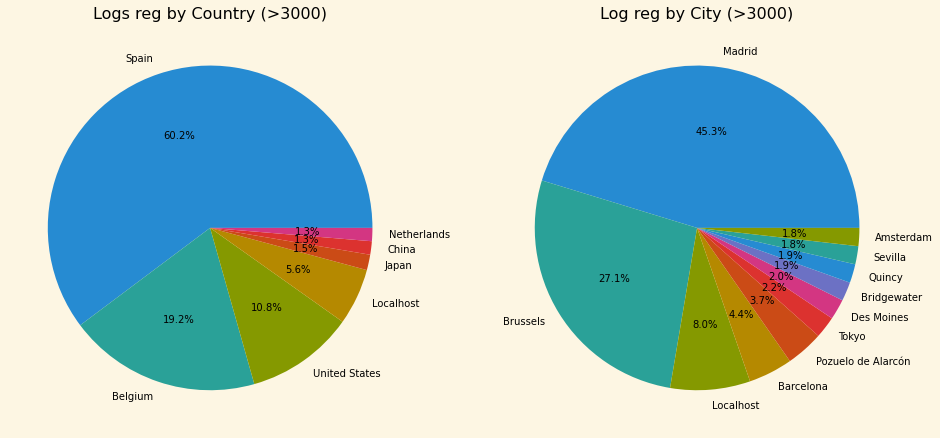

In [75]:
# Prepare data
country = ipdf.groupby('country_name')['count'].sum().sort_values(ascending = False)
city = ipdf.groupby('city')['count'].sum().sort_values(ascending = False)

# Create plot
fig, (ax1, ax2) = plt.subplots(figsize = (16, 8), nrows = 1, ncols = 2) # One figure with 2 subplots

labels1 = country.index[country > 3000]
ax1.pie(country[country > 3000], labels = labels1, autopct='%1.1f%%')
plt.subplot (1,2,1)

labels2 = city.index[city > 3000]
ax2.pie(city[city > 3000], labels = labels2, autopct='%1.1f%%')
plt.subplot (1,2,2)

# Style and customize plot
plt.style.use('Solarize_Light2')
ax1.set_title('Logs reg by Country (>3000)')
ax2.set_title('Log reg by City (>3000)')

# Show and save plot
plt.show()
# fig.savefig('xxx', dpi = 300, bbox_inches = 'tight')

From the previous outputs we can see that most of the logs come from Spain, Madrid followed by Belgium, Brussels.

Let's see in which days people do more logs to the site:

In [76]:
logs.date.min(), logs.date.max()

(Timestamp('2014-02-23 03:10:31'), Timestamp('2014-03-02 03:10:18'))

We have a week, from Sunday 2014-02-23 to Sunday 2014-03-02.

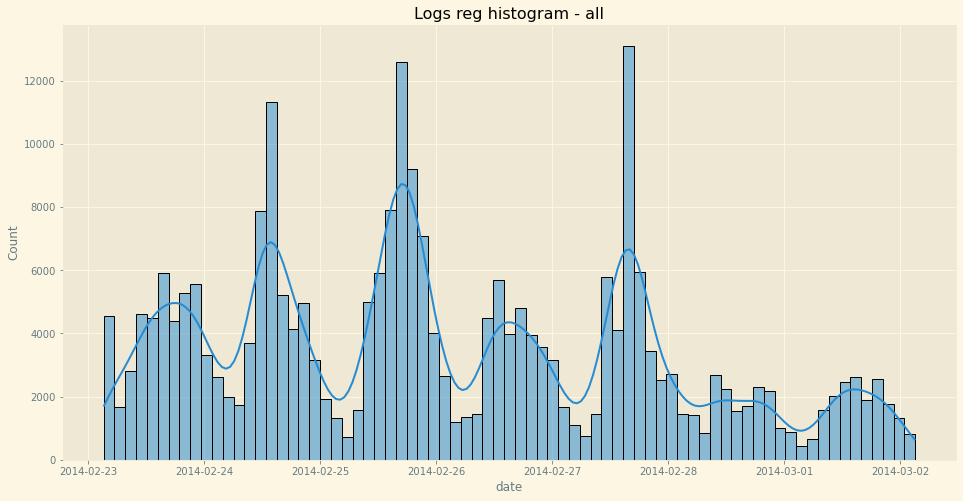

In [77]:
# Create plot
fig, ax = plt.subplots(figsize = (16, 8))
sns.histplot(logs.date, kde = True)

# Style and customize plot
plt.style.use('Solarize_Light2')
ax.set_title('Logs reg histogram - all')

# Show and save plot
plt.show()
# fig.savefig('xxx', dpi = 300, bbox_inches = 'tight')

People log in much more frequently on Monday, Tuesday, and Thursday. Let's see at what time:

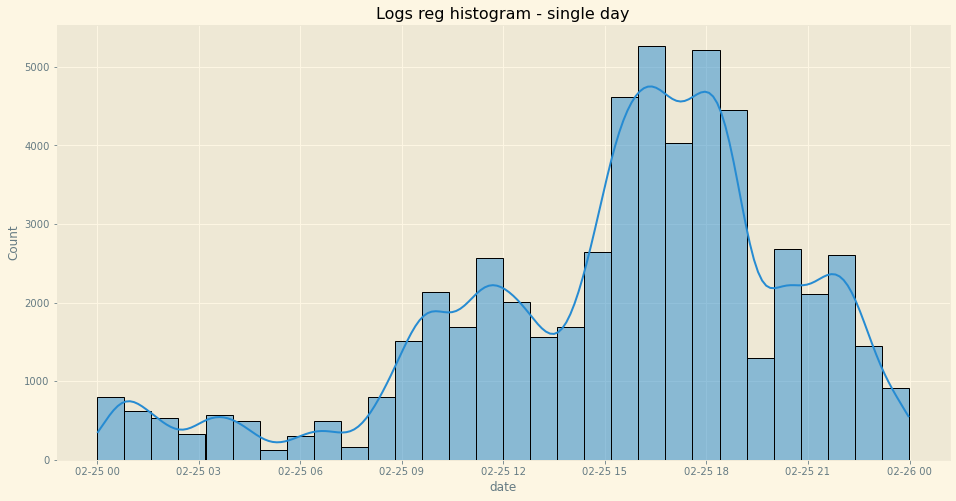

In [78]:
# Prepare data
high = logs.date[(logs.date > '2014-02-25 00:00:00') & (logs.date < '2014-02-25 23:59:00')]

# Create plot
fig, ax = plt.subplots(figsize = (16, 8))
sns.histplot(high, bins = 30, kde = True)

# Style and customize plot
plt.style.use('Solarize_Light2')
ax.set_title('Logs reg histogram - single day')

# Show and save plot
plt.show()
# fig.savefig('xxx', dpi = 300, bbox_inches = 'tight')

Most registrations occur between 14:00 and 20:00 hs central europe timezone.